## Hypothesis
DV1=INT

In [1]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
survey$IncHomeS[survey$IncHomeS==99] = NA;

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Trust",
    "MCG", "MCBill","Frugal","ComfortS","ComfortW","SubN","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];
sort(names(survey))
table(survey$Job)
table(survey$Political)

[1] "ACYN"        "Age"         "Atti"        "Atti1"       "Atti2"      
  [6] "Atti3"       "Atti4"       "Attitude"    "AwayS"       "AwaySNY"    
 [11] "AwayW"       "AwayWNY"     "BillS"       "BillW"       "CashYN"     
 [16] "City"        "cold"        "ComfNS"      "ComfNS1"     "ComfNS2"    
 [21] "ComfNS3"     "ComfNW"      "ComfNW1"     "ComfNW2"     "ComfortS"   
 [26] "ComfortW"    "CompR"       "ControlN1"   "ControlN2R"  "ControlN3"  
 [31] "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"     
 [36] "DeviceType"  "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"   
 [41] "EnergyC2"    "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal"     
 [46] "Frugal1"     "Frugal2"     "Frugal3"     "Gender"      "HabitC"     
 [51] "HabitC1"     "HabitC2"     "HabitC3"     "HabitC4"     "HabitC5"    
 [56] "HabitC6"     "HabitC7"     "HabitE1"     "HabitE2"     "HabitE3"    
 [61] "HabitG"      "HeatYN"      "HomeS"       "HomeSYN"     "HomeW"      
 [66] "HomeWYN"     "hot"         "HouseholdS"  "HTdevice"    "HTsource"   
 [71] "ID"          "IncAutoS"    "IncAutoW"    "IncAwayS"    "IncAwayW"   
 [76] "IncDish"     "IncEmer10S"  "IncEmer10W"  "IncEmer30S"  "IncEmer30W" 
 [81] "IncHomeS"    "IncHomeW"    "Income"      "IncWD"       "INT"        
 [86] "INT1"        "INT2"        "INT3"        "INT4"        "Job"        
 [91] "Latitude"    "Longitude"   "MC"          "MC1"         "MC2"        
 [96] "MC3"         "MC4"         "MC5"         "MCBill"      "MCG"        
[101] "NBillS"      "NBillW"      "OwnRent"     "PBC"         "PBC1"       
[106] "PBC2"        "PBC3R"       "PBC4"        "PBC5"        "PBillStatus"
[111] "Political"   "ReasonNeg"   "ReasonPos"   "RewardForm"  "SN"         
[116] "SN1"         "SN2"         "SN3"         "SN4"         "Sqft"       
[121] "SqftCate"    "State"       "SubN"        "SubNorm"     "SubNorm1"   
[126] "SubNorm2"    "SubNorm3"    "Summer_avg"  "Summer_avgC" "Summer_avgF"
[131] "Trust"       "Trust1"      "Trust2"      "Trust3"      "Trust4"     
[136] "Utility"     "valid"       "valid1"      "valid2"      "Winter_avg" 
[141] "Winter_avgC" "Winter_avgF" "X"           "X.9to5"


  1   2   3   4   5   6   7   8   9  10  11  12 
 99  79  33  33  25  64  86  71  43 112  22 156 


  1   2   3 
232 261 331 

In [2]:
tmp <- cbind(INT1=data1$INT1,INT2=data1$INT2,INT3=data1$INT3)
data1$INT <- rowMeans(tmp)

In [3]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "HomeW" "80"   
[1] "HomeS" "164"  
[1] "AwayW" "151"  
[1] "AwayS" "264"  
[1] "IncHomeS" "63"      
[1] "IncWD" "98"   
[1] "IncDish" "271"    
[1] "Age" "4"  
[1] "OwnRent" "2"      
[1] "BillS" "2"    
[1] "BillW" "2"    
[1] "Sqft" "2"   
[1] "SqftCate" "2"       
[1] "HouseholdS" "2"         
[1] "Political" "2"        
[1] "Ethnic" "2"     
[1] "Income" "5"     
[1] "Educ" "7"   
[1] "Latitude" "26"      
[1] "Summer_avgF" "42"         
[1] "Winter_avgF" "42"         
[1] "Summer_avgC" "42"         
[1] "Winter_avgC" "42"         
[1] "Summer_avg" "42"        
[1] "Winter_avg" "42"        


In [4]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "AwayS","IncWD","IncDish"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 826 106
[1] 597 106


In [5]:
#names(data2)
#These are only variables we really care about
IVS = c("Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
"EnergyC",
"MC",
"Attitude",
"SubNorm",
"PBC",
"HabitC",
"HabitG",
"ConvB1",
"ComfNS",
"ComfNW",
"INT",
"CashYN")

In [6]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "Attitude"    "BillS"       "BillW"       "CashYN"     
 [11] "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"     "ComfNW"     
 [16] "ComfNW1"     "ComfNW2"     "ControlN1"   "ControlN2R"  "ControlN3"  
 [21] "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"     
 [26] "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"   
 [31] "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal1"     "Frugal2"    
 [36] "Frugal3"     "Gender"      "HabitC"      "HabitC1"     "HabitC2"    
 [41] "HabitC3"     "HabitC4"     "HabitC5"     "HabitC6"     "HabitC7"    
 [46] "HabitE1"     "HabitE2"     "HabitE3"     "HabitG"      "HomeS"      
 [51] "HouseholdS"  "IncAutoS"    "IncAutoW"    "IncAwayS"    "IncAwayW"   
 [56] "IncEmer10S"  "IncEmer10W"  "IncEmer30S"  "IncEmer30W"  "IncHomeS"   
 [61] "IncHomeW"    "Income"      "INT"         "INT1"        "INT2"       
 [66] "INT3"        "INT4"        "Latitude"    "MC"          "MC1"        
 [71] "MC2"         "MC3"         "MC4"         "MC5"         "OwnRent"    
 [76] "PBC"         "PBC1"        "PBC2"        "PBC3R"       "PBC4"       
 [81] "PBC5"        "Political"   "RewardForm"  "SN"          "SN1"        
 [86] "SN2"         "SN3"         "SN4"         "Sqft"        "SqftCate"   
 [91] "State"       "SubNorm"     "SubNorm1"    "SubNorm2"    "SubNorm3"   
 [96] "Summer_avg"  "Summer_avgC" "Summer_avgF" "Trust1"      "Trust2"     
[101] "Trust3"      "Trust4"      "Winter_avg"  "Winter_avgC" "Winter_avgF"
[106] "X.9to5"

[1] "Age"        "Attitude"   "CashYN"     "ComfNS"     "ComfNW"    
 [6] "ConvB1"     "Educ"       "EnergyC"    "Ethnic"     "Gender"    
[11] "HabitC"     "HabitG"     "HouseholdS" "Income"     "INT"       
[16] "MC"         "OwnRent"    "PBC"        "Political"  "SqftCate"  
[21] "SubNorm"

In [7]:
data1 <- data2[, which(names(data2) %in% c("IncHomeS",IVS))];

In [8]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [9]:
names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

[1] "IncHomeS"   "ConvB1"     "Age"        "Gender"     "OwnRent"   
 [6] "SqftCate"   "HouseholdS" "Political"  "Ethnic"     "Income"    
[11] "Educ"       "EnergyC"    "Attitude"   "PBC"        "CashYN"    
[16] "MC"         "ComfNS"     "ComfNW"     "SubNorm"    "HabitG"    
[21] "HabitC"     "INT"

In [10]:
data1 [is.na(data1$IncHomeS), ]

In [11]:
summary(data1$IncHomeS)
table(data1$IncHomeS)
table(data1$HouseholdS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     3.0     4.0     4.2     5.0     8.0 


  1   2   3   4   5   6   7   8 
 50  41 115 202  54  56  45  34 


  1   2   3   4   5 
 66 213 133 111  74 

In [12]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "IncHomeS"   "ConvB1"     "Age"        "Gender"     "OwnRent"   
 [6] "SqftCate"   "HouseholdS" "Political"  "Ethnic"     "Income"    
[11] "Educ"       "EnergyC"    "Attitude"   "PBC"        "CashYN"    
[16] "MC"         "ComfNS"     "ComfNW"     "SubNorm"    "HabitG"    
[21] "HabitC"     "INT"

In [13]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [14]:
#convert all data to numeric values

sapply(data2,sd)

IncHomeS     ConvB1        Age     Gender    OwnRent   SqftCate HouseholdS 
      1.81       1.25      11.21       0.50       0.52       1.12       1.21 
 Political     Ethnic     Income       Educ    EnergyC   Attitude        PBC 
      0.83       0.38       2.00       1.10       1.39       1.10       0.94 
    CashYN         MC     ComfNS     ComfNW    SubNorm     HabitG     HabitC 
      0.27       1.08       1.46       1.74       1.35       1.17       1.42 
       INT 
      1.14

In [15]:
hiCor(data2,.7)

<0 x 0 matrix>

In [16]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:15];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:15){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.17
    ConvB1 EnergyC Attitude   PBC   MC SubNorm HabitG HabitC   INT
PC1   0.32   -0.34    -0.38 -0.24 -0.3   -0.28  -0.27  -0.24 -0.41
[1] 0.27
     Age OwnRent SqftCate HouseholdS Income
PC2 0.36     0.5     0.51       0.25   0.43
[1] 0.34
    IncHomeS Gender HouseholdS Ethnic Educ ComfNS ComfNW HabitC
PC3    -0.23  -0.42      -0.37   0.29 0.29  -0.27  -0.47   0.28
[1] 0.41
    IncHomeS ConvB1 Political Ethnic  Educ EnergyC  PBC   MC ComfNS HabitG
PC4      0.2  -0.25     -0.41   0.27 -0.28   -0.27 0.37 0.22   0.34   0.23
[1] 0.47
    IncHomeS  Age HouseholdS Political  Educ CashYN ComfNS
PC5    -0.46 -0.3       0.41     -0.26 -0.39   -0.3   -0.3
[1] 0.52
    IncHomeS  Age Gender Income   PBC CashYN HabitC
PC6     0.24 0.28   0.36  -0.28 -0.21  -0.58   0.22
[1] 0.57
    IncHomeS ConvB1 Ethnic EnergyC ComfNW SubNorm HabitG HabitC
PC7    -0.23  -0.28   0.49    0.22  -0.22    -0.3  -0.41  -0.37
[1] 0.61
    ConvB1 Gender Political Ethnic  Educ ComfNW SubNorm
PC8  -0.27  -0.28     

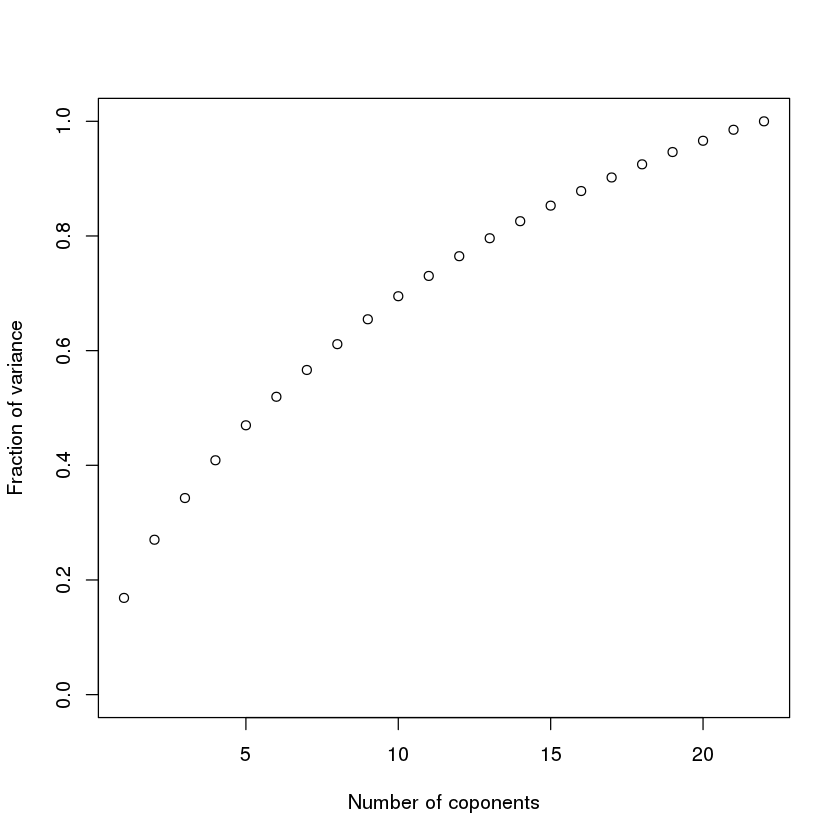

In [17]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [18]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [19]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

INT,22.00,0.52
Attitude,13.00,0.51
EnergyC,12.00,0.41
SqftCate,6.00,0.38
ConvB1,2.00,0.35
OwnRent,5.00,0.33
MC,16.00,0.28
HabitC,21.00,0.28
Income,10.00,0.27
HouseholdS,7.00,0.26
PBC,14.00,0.25


In [20]:
fit <- factanal(data2, 2, rotation="varimax")
print(fit, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = data2, factors = 2, rotation = "varimax")

Uniquenesses:
  IncHomeS     ConvB1        Age     Gender    OwnRent   SqftCate HouseholdS 
      0.96       0.72       0.84       0.95       0.55       0.45       0.88 
 Political     Ethnic     Income       Educ    EnergyC   Attitude        PBC 
      0.93       0.99       0.73       0.98       0.63       0.44       0.84 
    CashYN         MC     ComfNS     ComfNW    SubNorm     HabitG     HabitC 
      0.99       0.73       0.95       0.97       0.77       0.83       0.85 
       INT 
      0.39 

Loadings:
           Factor1 Factor2
ConvB1     -0.52          
EnergyC     0.61          
Attitude    0.75          
MC          0.52          
INT         0.78          
OwnRent             0.67  
SqftCate            0.74  
Income              0.51  
IncHomeS                  
Age                 0.40  
Gender                    
HouseholdS          0.34  
Political                 
Ethnic                    
Educ           

In [21]:
#Age, Gender, OwnRent, SqftCat, Income, Educ, EnergyC, MC, Attitude, SubNorm, PBC, HabitC, ComfNS,    
IndepPred = c("Age","Gender","OwnRent","SqftCate","Income","Educ","EnergyC","MC","Attitude","SubNorm","PBC","HabitC","ComfNS")

fmla <- as.formula(paste("INT",paste(IndepPred,collapse="+"),sep="~"));

In [22]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5787 -0.4459  0.0663  0.5169  2.0006 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.07257    0.34086    0.21   0.8315    
Age         -0.00524    0.00322   -1.63   0.1045    
Gender      -0.03541    0.06913   -0.51   0.6087    
OwnRent     -0.00614    0.07714   -0.08   0.9366    
SqftCate    -0.04060    0.03550   -1.14   0.2533    
Income      -0.00642    0.01898   -0.34   0.7353    
Educ         0.01524    0.03184    0.48   0.6324    
EnergyC      0.08007    0.02975    2.69   0.0073 ** 
MC           0.12826    0.03423    3.75   0.0002 ***
Attitude     0.38410    0.03931    9.77  < 2e-16 ***
SubNorm      0.11767    0.02744    4.29  2.1e-05 ***
PBC          0.25400    0.03757    6.76  3.4e-11 ***
HabitC       0.10802    0.02492    4.33  1.7e-05 ***
ComfNS      -0.05819    0.02360   -2.47   0.0140 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’

In [23]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1.00,0.40,0.40,0.62,0.43
Gender,1.0e+00,1.3e+01,1.3e+01,2.0e+01,8.6e-06
OwnRent,1.00,0.68,0.68,1.05,0.31
SqftCate,1.0000,5.0300,5.0300,7.7758,0.0055
Income,1.00,0.31,0.31,0.48,0.49
Educ,1.0000,6.6914,6.6914,10.3441,0.0014
EnergyC,1.0e+00,1.3e+02,1.3e+02,2.0e+02,1.9e-39
MC,1.0e+00,6.7e+01,6.7e+01,1.0e+02,1.5e-22
Attitude,1.0e+00,9.8e+01,9.8e+01,1.5e+02,3.4e-31
SubNorm,1.0e+00,2.1e+01,2.1e+01,3.2e+01,2.4e-08


In [358]:
#added CashYN to model
IndepPred = c("Age","Gender","OwnRent","SqftCate","Income","Educ","EnergyC","MC","Attitude","SubNorm","PBC","HabitC","ComfNS","CashYN")
fmla <- as.formula(paste("INT",paste(IndepPred,collapse="+"),sep="~"));
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5900 -0.4459  0.0784  0.5318  2.2101 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.09248    0.35009   -0.26  0.79176    
Age         -0.00557    0.00322   -1.73  0.08408 .  
Gender      -0.03129    0.06899   -0.45  0.65033    
OwnRent      0.00360    0.07711    0.05  0.96277    
SqftCate    -0.03916    0.03542   -1.11  0.26934    
Income      -0.00834    0.01896   -0.44  0.66004    
Educ         0.01375    0.03177    0.43  0.66536    
EnergyC      0.08102    0.02968    2.73  0.00652 ** 
MC           0.12386    0.03422    3.62  0.00032 ***
Attitude     0.38026    0.03926    9.69  < 2e-16 ***
SubNorm      0.11714    0.02737    4.28  2.2e-05 ***
PBC          0.25126    0.03751    6.70  4.9e-11 ***
HabitC       0.11137    0.02492    4.47  9.4e-06 ***
ComfNS      -0.06052    0.02357   -2.57  0.01051 *  
CashYNTRUE   0.24251    0.12254    1.98  0.04829 *  
---

In [359]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,0.40,0.40,0.62,4.3e-01
Gender,1,13.04,13.04,20.26,8.2e-06
OwnRent,1,0.68,0.68,1.05,3.1e-01
SqftCate,1,5.03,5.03,7.81,5.4e-03
Income,1,0.31,0.31,0.48,4.9e-01
Educ,1,6.69,6.69,10.40,1.3e-03
EnergyC,1,130.13,130.13,202.17,1.4e-39
MC,1,67.19,67.19,104.39,1.2e-22
Attitude,1,98.31,98.31,152.74,2.5e-31
SubNorm,1,20.70,20.70,32.15,2.2e-08
